# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Hafizh Dzaki
- Email: muhammadhafizhdzaki@gmail.com
- Id Dicoding: Haztsu

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

## Data Preparation / Preprocessing

In [5]:
# Termasuk kolom yang tidak jelas
unncessary_columns = ['Application_mode', 'Application_order', 'Course', 'Previous_qualification',
                      'Nacionality']

# Kolom yang secara sense meaningfull
numeric_columns = ['Previous_qualification_grade', 'Admission_grade',
                   'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
                    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
                    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                    'Curricular_units_1st_sem_without_evaluations','Curricular_units_2nd_sem_credited',
                    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
                    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                    'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
                    'Inflation_rate', 'GDP']
categorical_columns = ['Marital_status', 'Daytime_evening_attendance', 'Mothers_qualification', 
                       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
                       'Displaced', 'Educational_special_needs', 'Debtor', 
                       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
                       'International']

In [6]:
print(df[numeric_columns].describe())

       Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
count                   4424.000000      4424.000000        4424.000000   
mean                     132.613314       126.978119          23.265145   
std                       13.188332        14.482001           7.587816   
min                       95.000000        95.000000          17.000000   
25%                      125.000000       117.900000          19.000000   
50%                      133.100000       126.100000          20.000000   
75%                      140.000000       134.800000          25.000000   
max                      190.000000       190.000000          70.000000   

       Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.709991                           6.270570   
std                             2.360507                           2.480178   
min     

In [7]:
df.drop(unncessary_columns, axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df[numeric_columns] = df[numeric_columns].astype(np.float64)
df[categorical_columns] = df[categorical_columns].astype('category')
df = df[df['Status'] != 'Enrolled']

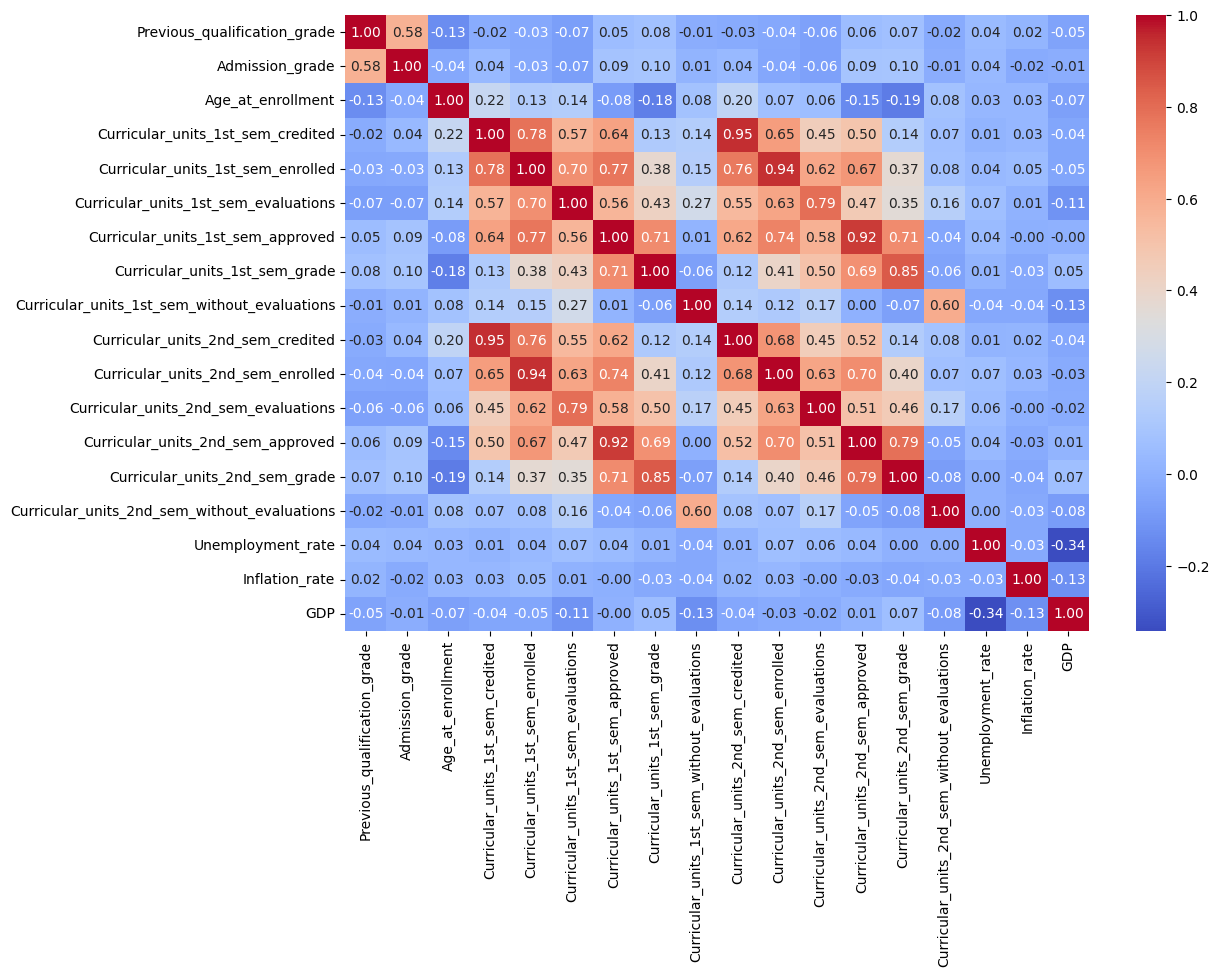

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', )
plt.show()

#### Analisis Variance Menggunakan VIF (Variance Inflation Factor) untuk Fitur Numerik

Menghilangkan multikolinearitas agar tidak ada ada fitur yang redundan. Sehingga diharapkan model ML bisa membedakan label lebih baik.

In [10]:
#  Variance Analysis using VIF (Variance Inflation Factor)
vif_df = pd.DataFrame()
vif_df['features'] = numeric_columns
vif_df['VIF'] = [variance_inflation_factor(df[numeric_columns].values, i) for i in range(df[numeric_columns].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df

,features,VIF
4,Curricular_units_1st_sem_enrolled,169.45
10,Curricular_units_2nd_sem_enrolled,144.69
0,Previous_qualification_grade,118.89
1,Admission_grade,110.99
6,Curricular_units_1st_sem_approved,49.51
12,Curricular_units_2nd_sem_approved,37.89
7,Curricular_units_1st_sem_grade,29.13
13,Curricular_units_2nd_sem_grade,27.10
15,Unemployment_rate,21.42
5,Curricular_units_1st_sem_evaluations,19.24


Terlihat nilai VIF untuk setiap 2 data berpola seperti redundan. Contoh :

|Fitur 1|Fitur 2|
|-|-|
|Curricular_units_1st_sem###|Curricular_units_2nd_sem###|
|Previous_qualification_grade|Admission_grade|

**### = enrolled, approved, w/o evaluations, credited, grade**

Maka buang salah satu. Pada projek ini saya akan menggunakan data sem 2 karena secara logika, nilai sem 2 adalah nilai terbaru yang tersedia di dataset.

In [11]:
drop_columns = ['Previous_qualification_grade', 'Curricular_units_1st_sem_enrolled',
                'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_credited',
                'Curricular_units_1st_sem_without_evaluations']
# 
df.drop(drop_columns, axis=1, inplace=True)

In [12]:
new_numeric_columns = [i for i in numeric_columns if i not in drop_columns]
new_numeric_columns

['Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [13]:
#  Variance Analysis using VIF (Variance Inflation Factor)
vif_df = pd.DataFrame()
vif_df['features'] = new_numeric_columns
vif_df['VIF'] = [variance_inflation_factor(df[new_numeric_columns].values, i) for i in range(df[new_numeric_columns].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df

,features,VIF
0,Admission_grade,28.98
3,Curricular_units_2nd_sem_enrolled,27.11
8,Unemployment_rate,20.21
5,Curricular_units_2nd_sem_approved,19.70
6,Curricular_units_2nd_sem_grade,18.48
1,Age_at_enrollment,10.70
4,Curricular_units_2nd_sem_evaluations,9.77
2,Curricular_units_2nd_sem_credited,2.62
9,Inflation_rate,1.82
10,GDP,1.14


Menurut [Datacamp](https://www.datacamp.com/tutorial/variance-inflation-factor), nilai VIF:

- 1 = tidak berkorelasi (Dipertahankan)
- 2 s.d. 5 = korelasi tingkat sedang (Boleh dipertahankan)
- 6 s.d. 10 = korelasi tingkat tinggi (Dipikirkan kembali untuk dipertahankan)
- \>11 = korelasi tingkat sangat tinggi (Sebaiknya dibuang saja, tetapi kembali ke domain knowdge)

Namun, karena Saya tidak memiliki domain knowledge, Saya akan mencoba trial & error.

In [14]:
drop_columns = [
                ]
# 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_grade',
# 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_evaluations',
# 'Unemployment_rate', 'Age_at_enrollment'
df.drop(drop_columns, axis=1, inplace=True)

In [15]:
new2_numeric_columns = [i for i in new_numeric_columns if i not in drop_columns]
new2_numeric_columns

['Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [16]:
#  Variance Analysis using VIF (Variance Inflation Factor)
vif_df = pd.DataFrame()
vif_df['features'] = new2_numeric_columns
vif_df['VIF'] = [variance_inflation_factor(df[new2_numeric_columns].values, i) for i in range(df[new2_numeric_columns].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df

,features,VIF
0,Admission_grade,28.98
3,Curricular_units_2nd_sem_enrolled,27.11
8,Unemployment_rate,20.21
5,Curricular_units_2nd_sem_approved,19.70
6,Curricular_units_2nd_sem_grade,18.48
1,Age_at_enrollment,10.70
4,Curricular_units_2nd_sem_evaluations,9.77
2,Curricular_units_2nd_sem_credited,2.62
9,Inflation_rate,1.82
10,GDP,1.14


Untuk fitur numerik sudah terlihat oke

#### Analsis Fitur Kategorikal dengan Cek Persebaran Kategori

In [17]:
# Hapus kolom yang nilai kategoriknya terlalu dominan
treshold = 0.95
for col in categorical_columns:
    freq = df[col].value_counts(normalize=True)
    print(col, ":", round(freq.max(), 2))
    if freq.max() > treshold:
        print(f"\tHapus {col} karena ada nilai yang terlalu dominan (membuat kolom hampir konstan)")
        df.drop(col, axis=1, inplace=True)
        categorical_columns.remove(col)

Marital_status : 0.88
Daytime_evening_attendance : 0.89
Mothers_qualification : 0.24
Fathers_qualification : 0.28
Mothers_occupation : 0.36
Fathers_occupation : 0.23
Displaced : 0.55
Educational_special_needs : 0.99
	Hapus Educational_special_needs karena ada nilai yang terlalu dominan (membuat kolom hampir konstan)
Tuition_fees_up_to_date : 0.87
Gender : 0.66
Scholarship_holder : 0.73
International : 0.98
	Hapus International karena ada nilai yang terlalu dominan (membuat kolom hampir konstan)


#### Analisis Relasi Data Kategorikal Menggunakan Crammer V

Link rumus : [here](https://en.wikipedia.org/wiki/Cramér%27s_V)

In [18]:
def cramers_v(df, feature_1, feature_2):
    confusion_matrix = pd.crosstab(df[feature_1].values, df[feature_2].values)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = df.shape[0]
    phi2 = chi2 / n
    r, k = df[feature_1].nunique(), df[feature_2].nunique()
    return np.sqrt(phi2 / min(k-1, r-1))

features_1 =[]
features_2 = []
v_scores = []

for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        col1, col2 = categorical_columns[i], categorical_columns[j]
        v_score = cramers_v(df, col1, col2)
        features_1.append(col1)
        features_2.append(col2)
        v_scores.append(v_score)
        
cramers_v_df = pd.DataFrame({'feature_1': features_1, 'feature_2': features_2, 'V_score': v_scores})
cramers_v_df[cramers_v_df['V_score'] > 0.3]

,feature_1,feature_2,V_score
0,Marital_status,Daytime_evening_attendance,0.358099
19,Mothers_qualification,Fathers_qualification,0.444869
34,Mothers_occupation,Fathers_occupation,0.644843
49,Debtor,Tuition_fees_up_to_date,0.433632


Menurut [Learn Statistic](https://statisticseasily.com/cramers-v/), berikut cara membaca V_score:

|Crammer's V Value|Arti|
|-|-|
|\<=0.1|Asosiasi yang sangat kecil / tidak berasosiasi|
|0.1 s.d. 0.3|Tingkat asosiasi yang rendah|
|\>0.3 s.d. 0.5|Tingkat asosiasi yang sedang|
|\>0.5|TIngkat asosiasi yang tinggi|

Hasil di atas masuk akal, sebagai contoh:

- Status pernikahan memungkinkan seseorang bisa menghadiri kelas pada sesi pagi / malam.
- Jika memiliki hutang, bisa jadi pembayaran kuliah belum lunas.

Semakin tinggi nilai Crammer's V, ada indikasi kolinearitas / fitur sudah bisa diwakilkan untuk data kategorikal. Bisa dihapus salah satunya, tetapi semua kembali pada *domain knowledge*.

Karena Saya tidak memiliki ilmu bidang ini, Saya akan melakukan trial & error

In [19]:
drop_columns = [
                'Mothers_qualification', 'Fathers_qualification']
#  'Marital_status', 'Debtor', 
df.drop(drop_columns, axis=1, inplace=True)

In [20]:
new_categorical_columns = [i for i in categorical_columns if i not in drop_columns]
new_categorical_columns

['Marital_status',
 'Daytime_evening_attendance',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder']

#### Handle Fitur Kategorikal yang Memiliki Nilai Kardinalitas Sangat Tinggi

Yang pilihan kategorinya terlalu sedikit buat jadi "other"

In [21]:
print(f"Banyak opsi untuk Mothers_occupation: {df['Mothers_occupation'].nunique()}")
print(f"Banyak opsi untuk Fathers_occupation: {df['Fathers_occupation'].nunique()}")

Banyak opsi untuk Mothers_occupation: 29
Banyak opsi untuk Fathers_occupation: 42


In [22]:
for col in ['Mothers_occupation', 'Fathers_occupation']:
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < 0.03].index # Nilai 0.03 trial & error
    df[col] = df[col].replace(rare_categories, 999) # 999 disini adalah simbolik dari others
    
print(f"Banyak opsi untuk Mothers_occupation: {df['Mothers_occupation'].value_counts()}")
print(f"Banyak opsi untuk Fathers_occupation: {df['Fathers_occupation'].value_counts()}")

Banyak opsi untuk Mothers_occupation: Mothers_occupation
9      1313
4       670
5       436
999     332
3       272
2       240
7       224
0       143
Name: count, dtype: int64
Banyak opsi untuk Fathers_occupation: Fathers_occupation
9      847
7      555
5      409
3      321
4      312
8      263
10     212
6      194
2      147
999    134
0      125
1      111
Name: count, dtype: int64


/tmp/ipykernel_4574/183634265.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare_categories, 999) # 999 disini adalah simbolik dari others
/tmp/ipykernel_4574/183634265.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare_categories, 999) # 999 disini adalah simbolik dari others


Fitur kategorikal sudah oke.

Preprocessing data sebelum modelling

In [23]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [24]:
new_categorical_columns = new_categorical_columns + ['Status']

le = LabelEncoder()
for col in new_categorical_columns:
    if df[col].dtype in ['category', 'object']:
        df[col] = le.fit_transform(df[col])
        label_dict = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"{col}:")
        for key, value in label_dict.items():
            print(f"  {key}: {value}")
        print("")

Marital_status:
  1: 0
  2: 1
  3: 2
  4: 3
  5: 4
  6: 5

Daytime_evening_attendance:
  0: 0
  1: 1

Mothers_occupation:
  0: 0
  2: 1
  3: 2
  4: 3
  5: 4
  7: 5
  9: 6
  999: 7

Fathers_occupation:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9
  10: 10
  999: 11

Displaced:
  0: 0
  1: 1

Debtor:
  0: 0
  1: 1

Tuition_fees_up_to_date:
  0: 0
  1: 1

Gender:
  0: 0
  1: 1

Scholarship_holder:
  0: 0
  1: 1

Status:
  Dropout: 0
  Graduate: 1



#### Menggunakan P-Values Hypothesis Testing untuk menentukan fitur yang paling berpengaruh kepada label

In [25]:
temp = ['Const'] + df.columns.to_list()[:-1]

X_with_constant = sm.add_constant(df[df.columns.to_list()[:-1]].values)
y = df['Status'].values
model = sm.OLS(y, X_with_constant).fit()
df_temp = pd.DataFrame({'Column Name': temp, 'P Values': model.pvalues.round(5)})\
    .sort_values(by='P Values', ascending=True)\
    .reset_index(drop=True)\
    .drop(0)
df_temp.drop(df_temp[df_temp['Column Name'] == 'Const'].index, inplace=True)

df_temp

,Column Name,P Values
1,Debtor,0.00000
2,Curricular_units_2nd_sem_approved,0.00000
3,Curricular_units_2nd_sem_evaluations,0.00000
4,Curricular_units_2nd_sem_credited,0.00000
5,Curricular_units_2nd_sem_enrolled,0.00000
6,Scholarship_holder,0.00000
7,Tuition_fees_up_to_date,0.00000
8,Gender,0.00016
9,Curricular_units_2nd_sem_grade,0.00071
10,Curricular_units_2nd_sem_without_evaluations,0.02326


In [45]:
fix_column_used = df_temp[df_temp['P Values']<0.1]['Column Name'].values.tolist()
fix_categorical = [i for i in new_categorical_columns if i in fix_column_used]
fix_numerical = [i for i in new2_numeric_columns if i in fix_column_used]

print(f"Fix columns used:\n{fix_column_used}")
print(f"Fix categorical used:\n{fix_categorical}")
print(f"Fix numerical used:\n{fix_numerical}")

Fix columns used:
['Debtor', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Scholarship_holder', 'Tuition_fees_up_to_date', 'Gender', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Admission_grade', 'Age_at_enrollment', 'Displaced', 'GDP']
Fix categorical used:
['Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']
Fix numerical used:
['Admission_grade', 'Age_at_enrollment', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'GDP']


In [46]:
all_df_col = fix_column_used + ['Status']
fixed_df = df[all_df_col]

copy_dataset = fixed_df.copy()
# scaler = MinMaxScaler()
# fixed_df[fix_numerical] = scaler.fit_transform(fixed_df[fix_numerical])
fixed_df


,Debtor,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Scholarship_holder,Tuition_fees_up_to_date,Gender,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Admission_grade,Age_at_enrollment,Displaced,GDP,Status
0,0,0.0,0.0,0.0,0.0,0,1,1,0.000000,0.0,127.3,20.0,1,1.74,0
1,0,6.0,6.0,0.0,6.0,0,0,1,13.666667,0.0,142.5,19.0,1,0.79,1
2,0,0.0,0.0,0.0,6.0,0,0,1,0.000000,0.0,124.8,19.0,1,1.74,0
3,0,5.0,10.0,0.0,6.0,0,1,0,12.400000,0.0,119.6,20.0,1,-3.12,1
4,0,6.0,6.0,0.0,6.0,0,1,0,13.000000,0.0,141.5,45.0,0,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,5.0,8.0,0.0,6.0,0,1,1,12.666667,0.0,122.2,19.0,0,-4.06,1
4420,1,2.0,6.0,0.0,6.0,0,0,0,11.000000,0.0,119.0,18.0,1,2.02,0
4421,0,1.0,9.0,0.0,8.0,1,1,0,13.500000,0.0,149.5,30.0,1,0.79,0
4422,0,5.0,6.0,0.0,5.0,1,1,0,12.000000,0.0,153.8,20.0,1,-3.12,1


In [47]:
X = fixed_df.drop('Status', axis=1)
y = fixed_df['Status']

#### Melihat persebaran Status Mahasiswa

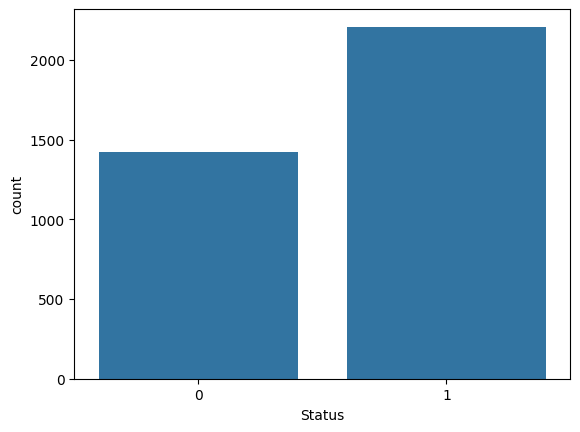

In [48]:
sns.countplot(x='Status', data=fixed_df)
plt.show()

In [49]:
sampler = SMOTE(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

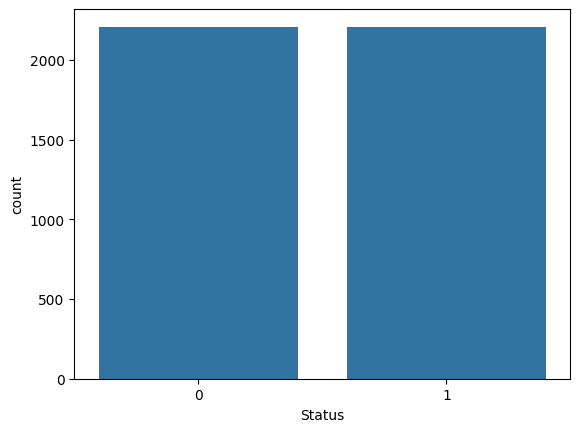

In [50]:
sns.countplot(x=y_resampled)
plt.show()

## Modeling + Evaluation

In [51]:
list_precision = []
list_recall = []
list_f1 = []
list_accuracy = []
list_idx = []
model_saved = []

for idx, mat in enumerate(df_temp[df_temp['P Values']<0.01]['Column Name'].values):
    used_matters = df_temp[df_temp['P Values']<0.01]['Column Name'].values[:idx+1]
    algo = XGBClassifier(random_state=42,
                        # scale_pos_weight=y.value_counts()[0]/y.value_counts()[1],
                        )
#     # algo = RandomForestClassifier(random_state=42)

    algo.fit(X_train_resampled[used_matters], y_train_resampled)
    y_pred = algo.predict(X_test[used_matters])
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)
    list_precision.append(precision)
    list_recall.append(recall)
    list_f1.append(f1)
    list_accuracy.append(accuracy)
    list_idx.append(idx+1)
    model_saved.append(algo)
    
df_result = pd.DataFrame({
    'column used': list_idx,
    'precision': list_precision,
    'recall': list_recall,
    'f1': list_f1,
    'accuracy': list_accuracy,
})


df_result.head(25)

,column used,precision,recall,f1,accuracy
0,1,0.624302,0.544118,0.456461,0.544118
1,2,0.888827,0.884615,0.884302,0.884615
2,3,0.881850,0.880090,0.879952,0.880090
3,4,0.884715,0.883484,0.883391,0.883484
4,5,0.897517,0.897059,0.897029,0.897059
5,6,0.906460,0.906109,0.906088,0.906109
6,7,0.915055,0.914027,0.913974,0.914027
7,8,0.915927,0.915158,0.915119,0.915158
8,9,0.908251,0.907240,0.907182,0.907240


In [52]:
best_idx = df_result['f1'].idxmax()
best_idx

7

In [54]:
used_features = df_temp[df_temp['P Values']<0.1]['Column Name'].values[:best_idx+1]
used_features

array(['Debtor', 'Curricular_units_2nd_sem_approved',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled', 'Scholarship_holder',
       'Tuition_fees_up_to_date', 'Gender'], dtype=object)

In [55]:
best_model = model_saved[best_idx]

with open('./model/model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

#### Coba Predict

In [56]:
model = pickle.load(open('./model/model.pkl', 'rb'))

X = copy_dataset[used_features]
y = copy_dataset['Status']

y_pred = model.predict(X[used_features])
y_pred_proba = model.predict_proba(X[used_features])[:, 1]
f1 = f1_score(y, y_pred, average="macro")
accuracy = accuracy_score(y, y_pred)

f1, accuracy

(0.9265912452620875, 0.9305785123966942)